In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm, skew


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV


# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to see model hyperparameters
from sklearn import set_config
set_config(print_changed_only = False)

# to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# !conda env list
# import sklearn
# sklearn.__version__
# !conda activate car_price_env

In [68]:
import sklearn
sklearn.__version__

'1.3.2'

In [69]:
!python --version

Python 3.9.12


In [3]:
df  = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
df['name'].loc[:10]

0                 Maruti 800 AC
1      Maruti Wagon R LXI Minor
2          Hyundai Verna 1.6 SX
3        Datsun RediGO T Option
4         Honda Amaze VX i-DTEC
5          Maruti Alto LX BSIII
6     Hyundai Xcent 1.2 Kappa S
7      Tata Indigo Grand Petrol
8      Hyundai Creta 1.6 VTVT S
9      Maruti Celerio Green VXI
10      Chevrolet Sail 1.2 Base
Name: name, dtype: object

In [5]:
df['car_brand_name'] = df['name'].str.split(' ', 1).str[0].astype('category')
# df['model1'] = df['name'].str.split(' ', 1).str[1]
# df['model1'] 
df['car_brand_name']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: car_brand_name, Length: 4340, dtype: category
Categories (29, object): ['Ambassador', 'Audi', 'BMW', 'Chevrolet', ..., 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

In [6]:
brand_uniques = df['car_brand_name'].unique().tolist()
print(brand_uniques)

['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet', 'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep', 'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat', 'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG', 'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia']


In [7]:
# df['model'] = df['model1'].str.extract('([A-Za-z]+)', expand=False)
# unique_models = df['model'].unique().tolist()
# print(unique_models)
# df = df.drop('model1' , axis=1)

In [8]:
df = df.drop('name' , axis=1)

In [9]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            4340 non-null   int64   
 1   selling_price   4340 non-null   int64   
 2   km_driven       4340 non-null   int64   
 3   fuel            4340 non-null   object  
 4   seller_type     4340 non-null   object  
 5   transmission    4340 non-null   object  
 6   owner           4340 non-null   object  
 7   car_brand_name  4340 non-null   category
dtypes: category(1), int64(3), object(4)
memory usage: 243.0+ KB


In [11]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [12]:
# check whether there are null values in the dataset
df.isnull().sum()

year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
car_brand_name    0
dtype: int64

In [13]:
df.describe().style.background_gradient(cmap = "viridis")

,year,selling_price,km_driven
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,504127.311751,66215.777419
std,4.215344,578548.736139,46644.102194
min,1992.000000,20000.000000,1.000000
25%,2011.000000,208749.750000,35000.000000
50%,2014.000000,350000.000000,60000.000000
75%,2016.000000,600000.000000,90000.000000
max,2020.000000,8900000.000000,806599.000000


In [14]:
df.describe(include = "category").T

,count,unique,top,freq
car_brand_name,4340,29,Maruti,1280


In [15]:
#get class frequencies of some variables

print("Class frequencies of 'transmission' variable: \n\n", df["transmission"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'seller_type' variable: \n\n", df["seller_type"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'owner' variable: \n\n", df["owner"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'car_brand_name' variable: \n\n", df["car_brand_name"].value_counts())
print("_____________________________________________________________________________________")
# print("Class frequencies of 'car_model_name' variable: \n\n", df["model"].value_counts())


Class frequencies of 'transmission' variable: 

 Manual       3892
Automatic     448
Name: transmission, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'seller_type' variable: 

 Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'owner' variable: 

 First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'car_brand_name' variable: 

 Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswa

# Univariate Analysis:

>>>Visualize the distribution of numeric variables like 'year', 'km_driven', and 'selling_price' using histograms or box plots.

<AxesSubplot:xlabel='year'>

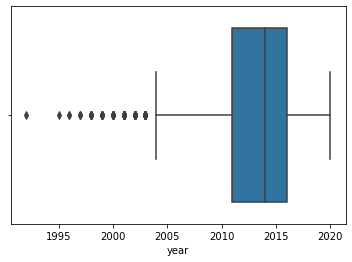

In [16]:
sns.boxplot(df['year'])

In [17]:
import datetime
current_year = datetime.datetime.now().year
df['year'] = current_year - df['year']

In [18]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,16,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,16,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,11,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,6,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,9,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,9,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,9,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,14,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,7,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


<AxesSubplot:xlabel='km_driven'>

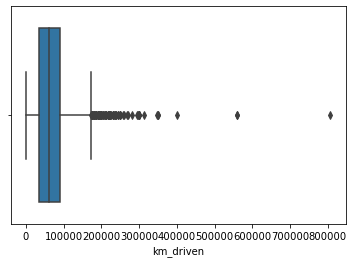

In [19]:
sns.boxplot(df['km_driven'])

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

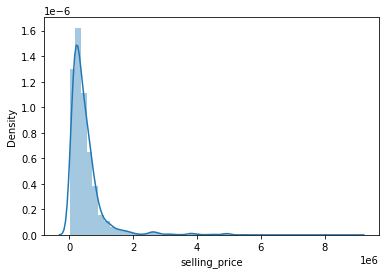

In [20]:
sns.distplot(df['selling_price'])

<AxesSubplot:xlabel='selling_price'>

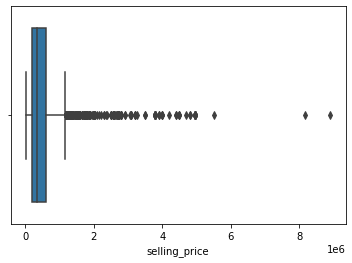

In [21]:
"""# Example: Capping outliers in 'selling_price'
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df['selling_price'] = df['selling_price'].apply(lambda x: upper_limit if x > upper_limit else x)"""
sns.boxplot(x=df['selling_price'])

# Bivariate Analysis:

>>>Explore relationships between numeric variables and the target variable ('selling_price') using scatter plots or correlation matrices.
Analyze the impact of categorical variables on 'selling_price' using box plots or bar plots.

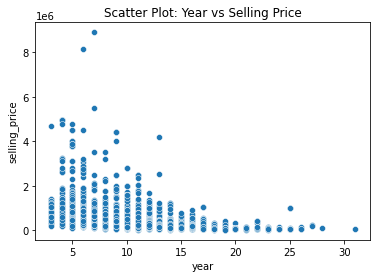

In [22]:
# Scatter plot: Year vs Selling Price
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Scatter Plot: Year vs Selling Price')
plt.show()

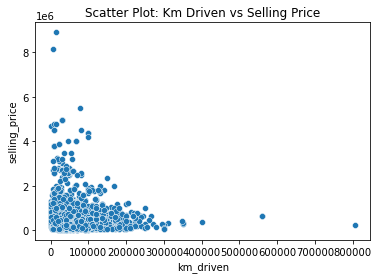

In [23]:
# Scatter plot: Km Driven vs Selling Price
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Scatter Plot: Km Driven vs Selling Price')
plt.show()

<AxesSubplot:>

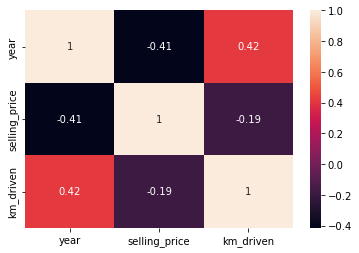

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df['transmission'].value_counts().to_dict()
df['seller_type'].value_counts().to_dict()
df['owner'].value_counts().to_dict()
df['fuel'].value_counts().to_dict()

{'Diesel': 2153, 'Petrol': 2123, 'CNG': 40, 'LPG': 23, 'Electric': 1}

In [26]:
df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 0}).astype('int')
df['seller_type'] = df['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}).astype('int')
df['owner'] = df['owner'].replace({'First Owner': 1,'Second Owner': 2,'Third Owner': 3,
 'Fourth & Above Owner': 4,
 'Test Drive Car': 0}).astype('int')
df['fuel']=df['fuel'].replace({'Diesel': 1, 'Petrol': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5}).astype('int')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            4340 non-null   int64   
 1   selling_price   4340 non-null   int64   
 2   km_driven       4340 non-null   int64   
 3   fuel            4340 non-null   int32   
 4   seller_type     4340 non-null   int32   
 5   transmission    4340 non-null   int32   
 6   owner           4340 non-null   int32   
 7   car_brand_name  4340 non-null   category
dtypes: category(1), int32(4), int64(3)
memory usage: 175.2 KB


<AxesSubplot:>

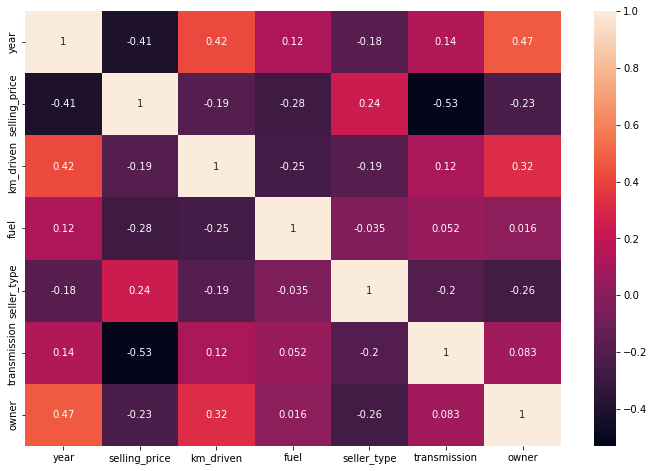

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [29]:
# df = df.drop('km_driven',axis=1)

In [30]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,16,60000,70000,2,0,1,1,Maruti
1,16,135000,50000,2,0,1,1,Maruti
2,11,600000,100000,1,0,1,1,Hyundai
3,6,250000,46000,2,0,1,1,Datsun
4,9,450000,141000,1,0,1,2,Honda


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

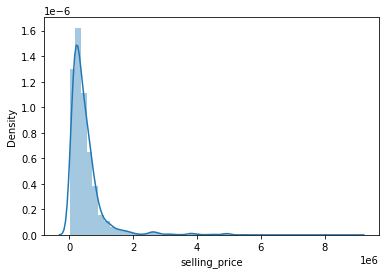

In [31]:
sns.distplot(df["selling_price"])

In [32]:
print("Skewness of target variable: ", df["selling_price"].skew())
print("Kurtosis of target variable: ", df["selling_price"].kurt())

Skewness of target variable:  4.892021472306356
Kurtosis of target variable:  37.08754263212727


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

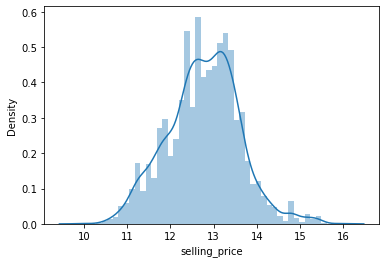

In [33]:
sns.distplot(np.log(df["selling_price"]))

In [34]:
# get skewness of other numeric variables

numeric_data = [column for column in df.select_dtypes(["int", "float"])]
for col in numeric_data:
    print("Skewness of", col, "variable is:", df[col].skew())

Skewness of year variable is: 0.8332399429173999
Skewness of selling_price variable is: 4.892021472306356
Skewness of km_driven variable is: 2.6690569869843133
Skewness of fuel variable is: 0.6060992827051294
Skewness of seller_type variable is: 1.5628409172591309
Skewness of transmission variable is: -2.609082802082893
Skewness of owner variable is: 1.5121472495085855


In [35]:
# select dependent variable (label)
y = df["selling_price"]
y = np.log1p(y)

In [36]:
# select independent variable (estimator)
x = df.drop("selling_price", axis = 1)

#encode the variables of the dataset
x = pd.get_dummies(x, drop_first = True)

In [37]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand_name
0,16,60000,70000,2,0,1,1,Maruti
1,16,135000,50000,2,0,1,1,Maruti
2,11,600000,100000,1,0,1,1,Hyundai
3,6,250000,46000,2,0,1,1,Datsun
4,9,450000,141000,1,0,1,2,Honda


In [38]:
x.head()

,year,km_driven,fuel,seller_type,transmission,owner,car_brand_name_Audi,car_brand_name_BMW,car_brand_name_Chevrolet,car_brand_name_Daewoo,car_brand_name_Datsun,car_brand_name_Fiat,car_brand_name_Force,car_brand_name_Ford,car_brand_name_Honda,car_brand_name_Hyundai,car_brand_name_Isuzu,car_brand_name_Jaguar,car_brand_name_Jeep,car_brand_name_Kia,car_brand_name_Land,car_brand_name_MG,car_brand_name_Mahindra,car_brand_name_Maruti,car_brand_name_Mercedes-Benz,car_brand_name_Mitsubishi,car_brand_name_Nissan,car_brand_name_OpelCorsa,car_brand_name_Renault,car_brand_name_Skoda,car_brand_name_Tata,car_brand_name_Toyota,car_brand_name_Volkswagen,car_brand_name_Volvo
0,16,70000,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,16,50000,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,11,100000,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,46000,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,141000,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Split the dataset into x_train (y_train) and x_test (y_test) sets

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)

(3472, 34)
(868, 34)


In [40]:
# rob_scaler = RobustScaler()
# rob_scaler.fit(x_train)
# x_train = rob_scaler.transform(x_train)
# x_test = rob_scaler.transform(x_test)

In [41]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [42]:
# Training data Evaluation
y_train_pred = lr.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print('mean_squared_error :',mse)

rmse = np.sqrt(mse)
print('Root_mean_squared_error :',rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print('mean_absolute_error :',mae)

r = r2_score(y_train,y_train_pred)
print('r2_score :',r)

mean_squared_error : 0.1479730083129601
Root_mean_squared_error : 0.3846725988590298
mean_absolute_error : 0.30377244087180755
r2_score : 0.7901135245481785


In [43]:
# Testing data Evaluation
y_test_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print('mean_squared_error :',mse)

rmse = np.sqrt(mse)
print('Root_mean_squared_error :',rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print('mean_absolute_error :',mae)

r2 = r2_score(y_test, y_test_pred)
print('R-Squared:', r2)

mean_squared_error : 0.1510150227423161
Root_mean_squared_error : 0.38860651402455426
mean_absolute_error : 0.30387478321581674
R-Squared: 0.7845347915244288


In [44]:
import pickle
with open('car_price_predction Model.pkl','wb')as f:
    pickle.dump(lr,f)

In [45]:
len(x.columns)

34

In [46]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_brand_name'],
      dtype='object')

In [47]:
df['car_brand_name'].nunique()

29

In [48]:
x_train.head().T

,3294,2290,874,1907,3244
year,5,15,6,8,10
km_driven,50000,70000,50000,92198,3240
fuel,1,2,2,2,2
seller_type,0,0,0,1,0
transmission,0,0,1,1,1
owner,1,1,1,2,2
car_brand_name_Audi,0,0,0,0,0
car_brand_name_BMW,0,0,0,0,0
car_brand_name_Chevrolet,0,0,0,0,0
car_brand_name_Daewoo,0,0,0,0,0


In [60]:
np.expm1(y)

0        60000.0
1       135000.0
2       600000.0
3       250000.0
4       450000.0
          ...   
4335    409999.0
4336    409999.0
4337    110000.0
4338    865000.0
4339    225000.0
Name: selling_price, Length: 4340, dtype: float64

In [53]:
test_array = np.zeros(len(x_train.columns))

In [55]:
len(x_train.columns)

34

In [50]:
len(test_array)

34

In [62]:
a= lr.predict([[14, 4000, 1, 0., 1, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
np.expm1(a)

array([323681.53715836])

In [64]:
datetime.datetime.today().year

2023